### Read eqd Files with Numpy and Plot

In [1]:
# import all the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
# https://freeqdsk.readthedocs.io/en/stable/geqdsk.html
from freeqdsk import geqdsk
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# read the ./eqds/circ_mtm_07_09.eqd file as a text file, selecting only the first 3 columns
filename = "./geqdsks/ITER_10MA.geqdsk"

In [3]:
with open(filename, "r") as f:
    data = geqdsk.read(f)

In [4]:
data.keys()

dict_keys(['comment', 'int', 'nx', 'ny', 'rdim', 'zdim', 'rcentr', 'rleft', 'zmid', 'rmagx', 'zmagx', 'simagx', 'sibdry', 'bcentr', 'cpasma', 'fpol', 'pres', 'ffprime', 'pprime', 'psi', 'qpsi', 'nbdry', 'nlim', 'rbdry', 'zbdry', 'rlim', 'zlim'])

In [5]:
# len of data['psi']
psi = data['psi']
print(psi.shape)
type(psi)

(256, 257)


numpy.ndarray

>The 2D grid is instead expressed on a linearly spaced grid extending the range [rleft, rleft + rdim] in the R direction and [zmid - zdim/2, zmid + zdim/2] in the Z direction.

In [6]:
# create a meshgrid to plot the psi values
x = np.linspace(data['rleft'], data['rleft'] + data['rdim'], data['nx'])
y = np.linspace(data['zmid'] - data['zdim'] / 2, data['zmid'] + data['zdim'] / 2, data['ny'])
xx, yy = np.meshgrid(x, y)

In [7]:
# rotate the psi matrix by 90 degrees to match the plot
psi = np.rot90(psi)

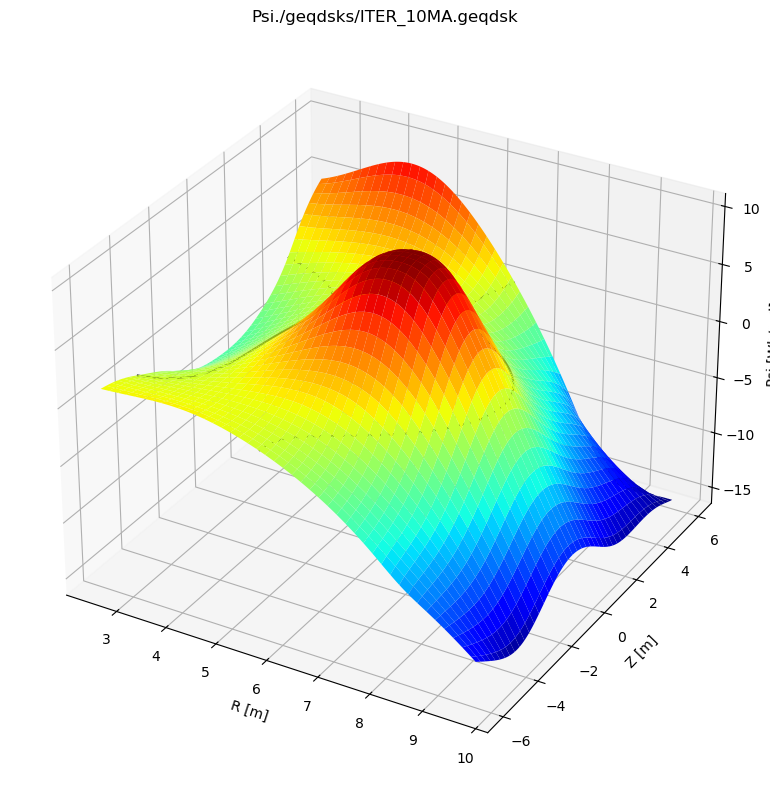

In [8]:
# plot the psi values
# create a figure
fig = plt.figure()
# set figure size
fig.set_size_inches(8, 8)

# create an axis 3D
ax = fig.add_subplot(111, projection='3d')
# plot the surface
ax.plot_surface(xx, yy, psi, cmap='jet')
# add x, y, z labels
ax.set_xlabel('R [m]')
ax.set_ylabel('Z [m]')
ax.set_zlabel('Psi [Wb/rad]')
# add a title
ax.set_title('Psi'+filename)

# add a contour plot at psi = 0
plt.contour(xx, yy, psi, levels=[0], colors='black')

plt.tight_layout()
plt.show()